In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch import Tensor

import math
import numpy as np

from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import random

from pathlib import Path

## Set path to dir with model projects

In [2]:
projects_path = Path("/home/falaxdb/Repos/minus1/transformer_decoder_training/saved_files/saved_models")

device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

dataset_dir = "/home/falaxdb/Repos/minus1/datasets/maestro_v3_split/hands_split_into_seperate_midis"

import transformer_decoder_training.training_helper_functions as helper

Processed dataset (1038/1038): 100%|██████████| 1038/1038 [00:10<00:00, 99.77it/s] 


Processed 1038 of 1038 files
The train loader has 2059 batches with a size of 512
The model is trained on approximately 1054208 sequences
Start training Model with following parameters:
model_project_name: transformer_1.0
model_params: 
  model_topology: Transformer(
  (embedding): Linear(in_features=24, out_features=1024, bias=True)
  (pos_emb): SinusoidalPosEmb()
  (blocks): ModuleList(
    (0-7): 8 x TransformerBlock(
      (norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (multihead_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
      )
      (norm2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (mlp): Sequential(
        (0): Linear(in_features=1024, out_features=4096, bias=True)
        (1): ELU(alpha=1.0)
        (2): Linear(in_features=4096, out_features=1024, bias=True)
      )
    )
  )
  (fc_out): Linear(in_features=1024, out_features=24, bias=True)
)
  num_emb

Epoch: 1, Train loss: 0.182, Val loss: 0.173, Epoch time = 166.171s


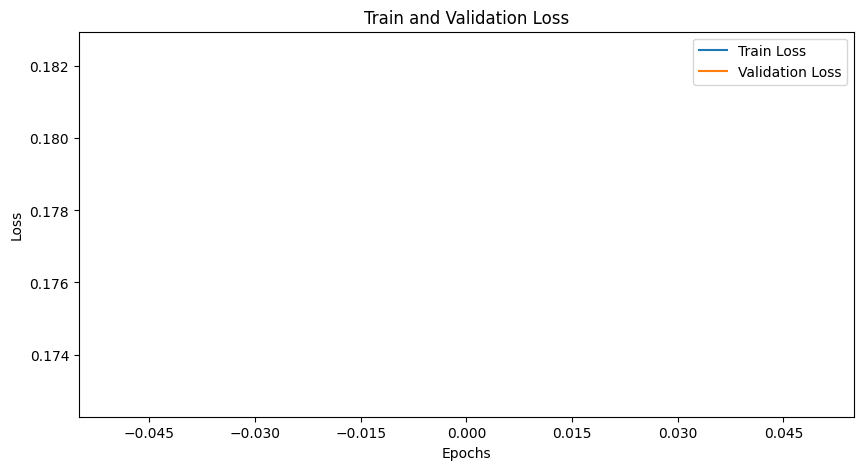

Epoch: 2, Train loss: 0.176, Val loss: 0.171, Epoch time = 166.065s


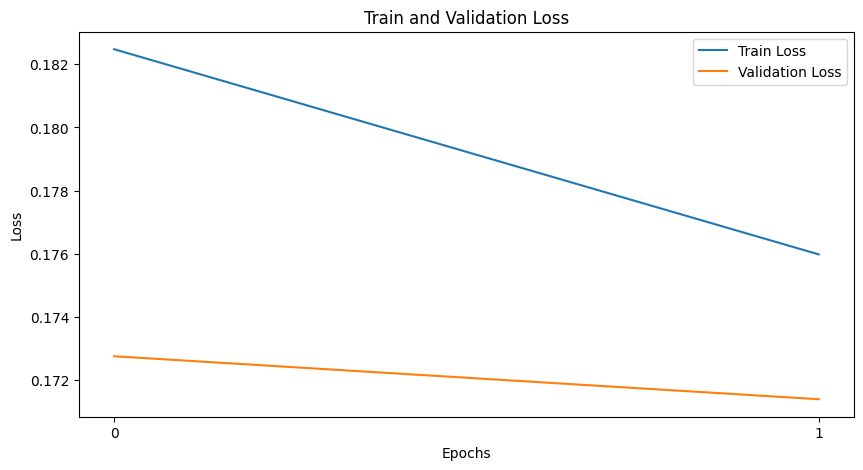

Epoch: 3, Train loss: 0.175, Val loss: 0.171, Epoch time = 158.869s


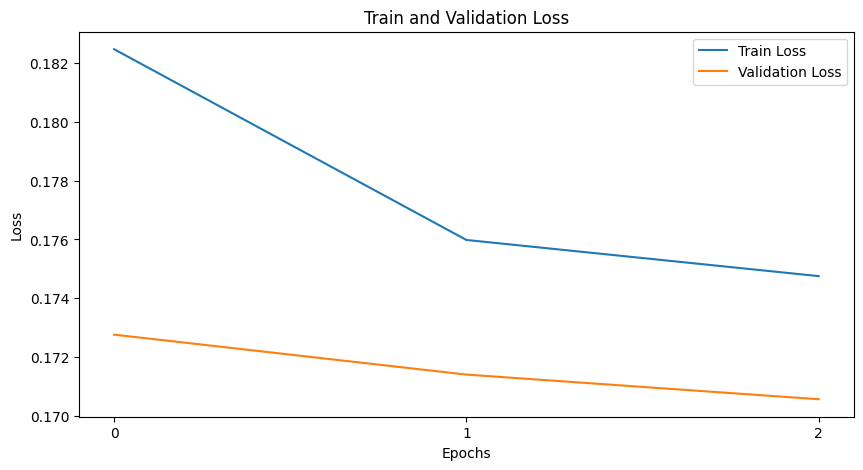

Epoch: 4, Train loss: 0.174, Val loss: 0.170, Epoch time = 158.460s


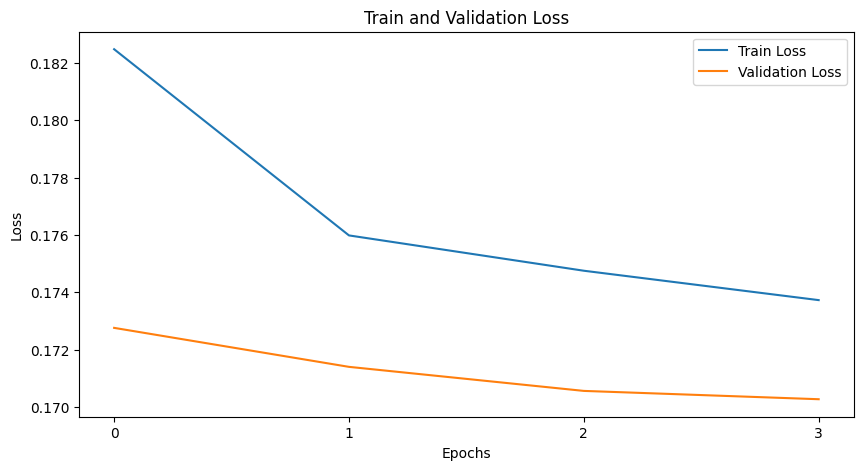

Epoch: 5, Train loss: 0.173, Val loss: 0.170, Epoch time = 158.509s


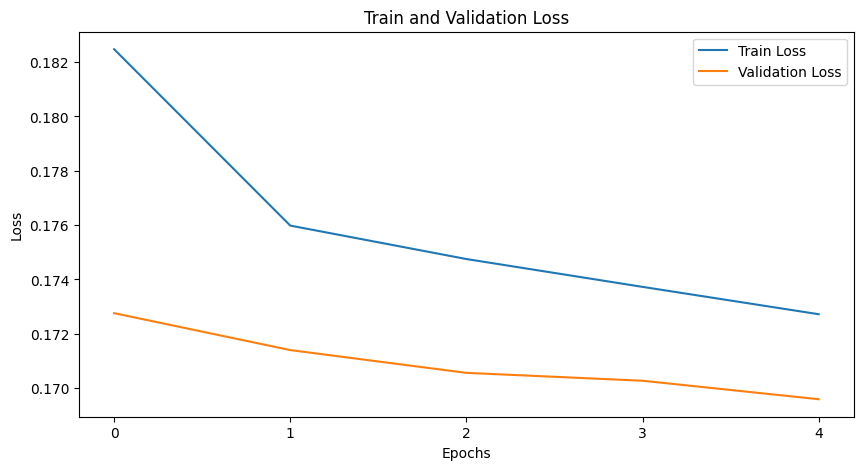

Epoch: 6, Train loss: 0.172, Val loss: 0.169, Epoch time = 158.733s


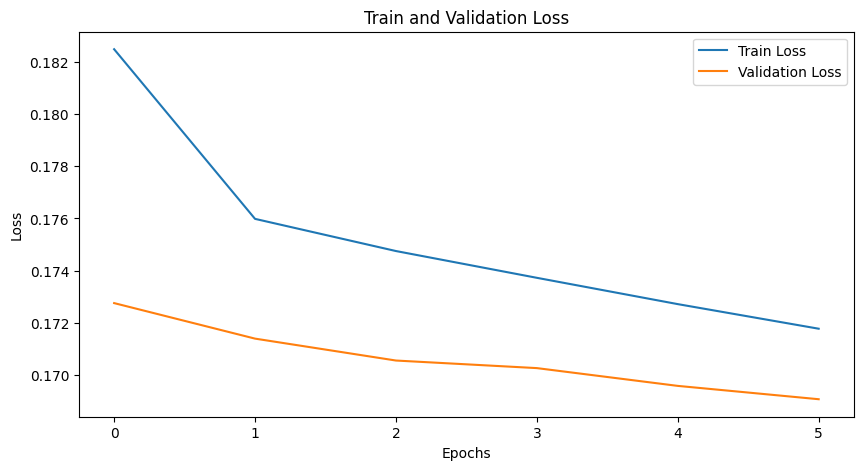

Epoch: 7, Train loss: 0.171, Val loss: 0.169, Epoch time = 158.932s


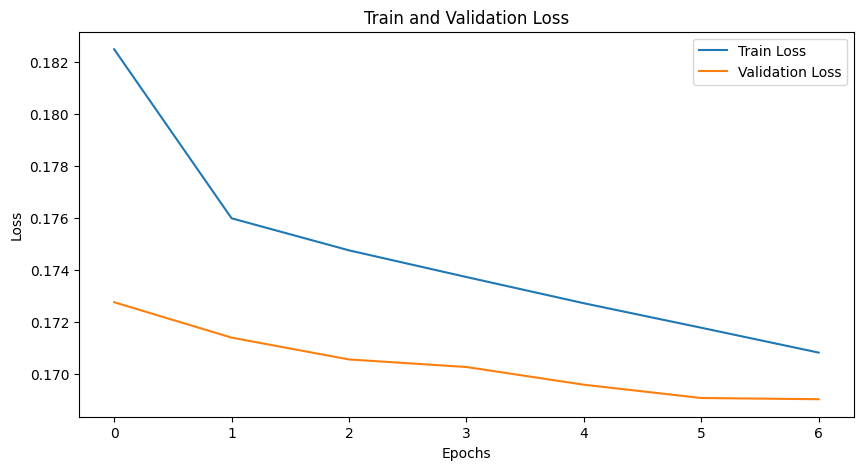

Epoch: 8, Train loss: 0.170, Val loss: 0.169, Epoch time = 158.744s


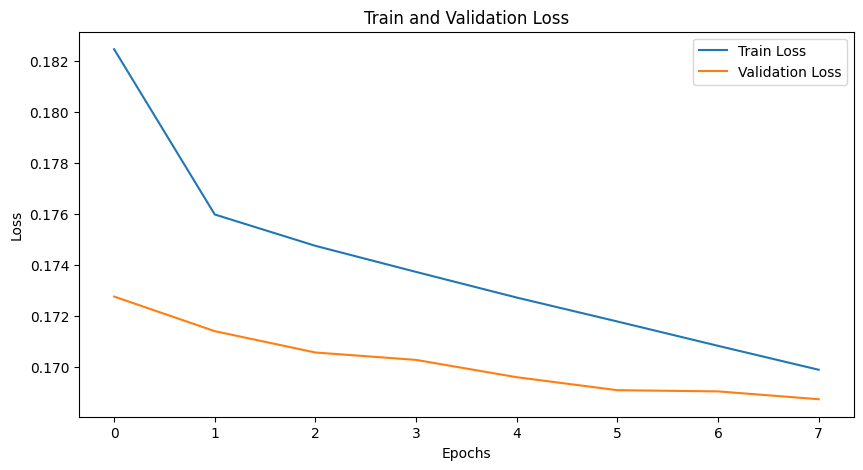

Epoch: 9, Train loss: 0.169, Val loss: 0.169, Epoch time = 159.000s


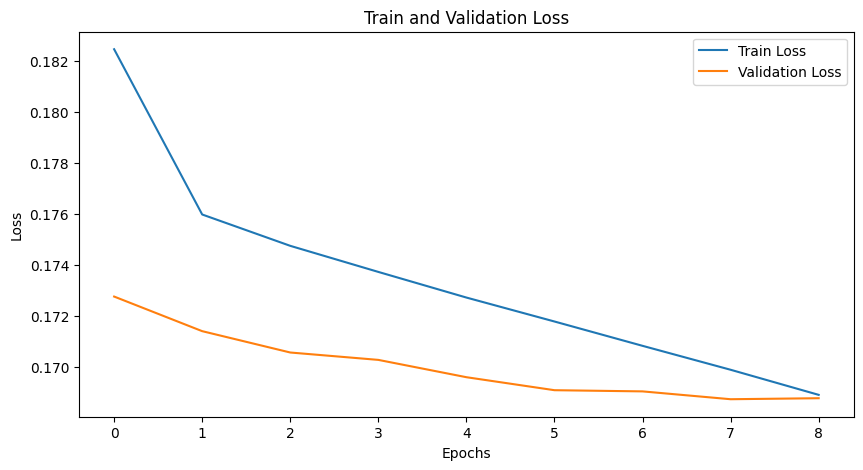

Epoch: 10, Train loss: 0.168, Val loss: 0.169, Epoch time = 158.890s


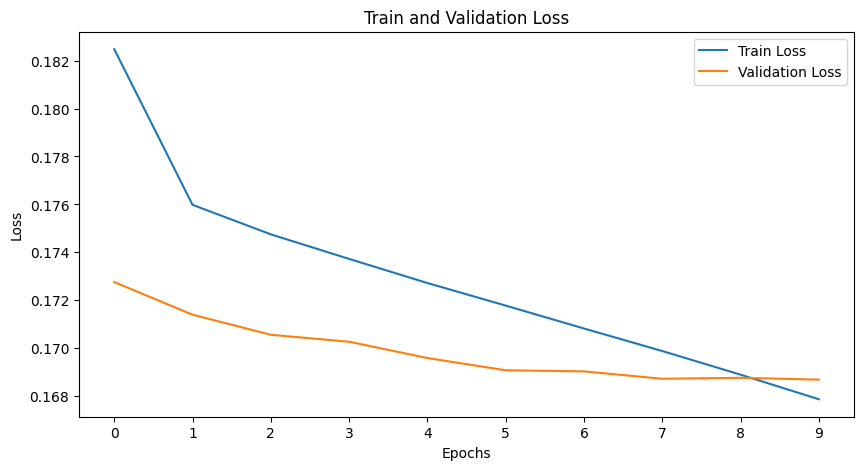

Epoch: 11, Train loss: 0.167, Val loss: 0.169, Epoch time = 158.720s


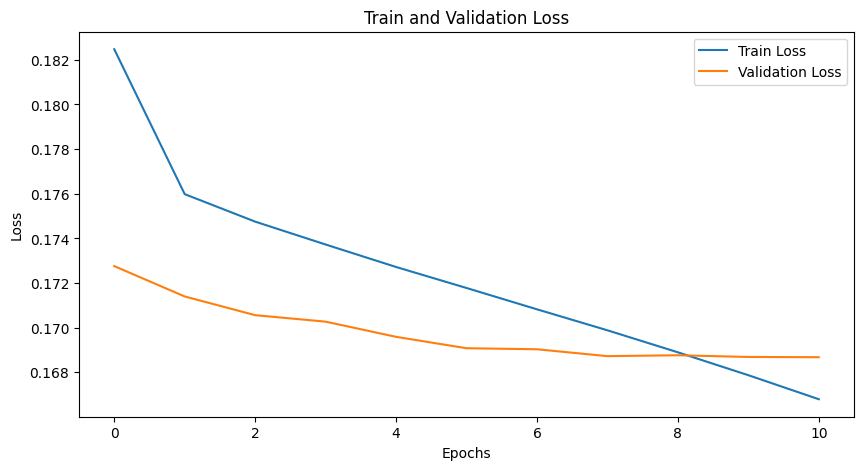

Epoch: 12, Train loss: 0.166, Val loss: 0.169, Epoch time = 158.970s


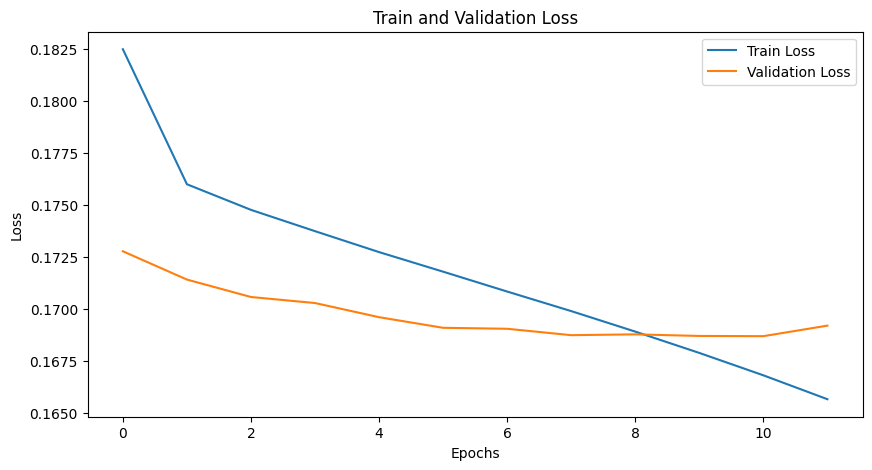

Epoch: 13, Train loss: 0.164, Val loss: 0.169, Epoch time = 158.765s


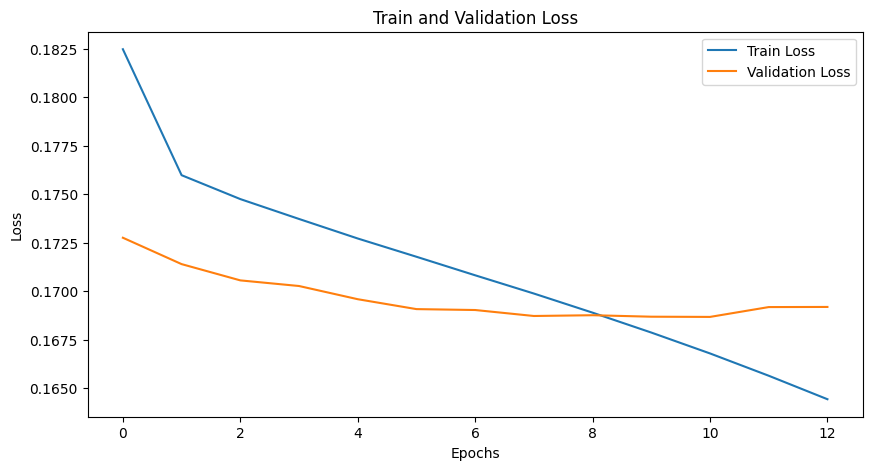

Epoch: 14, Train loss: 0.163, Val loss: 0.170, Epoch time = 159.037s


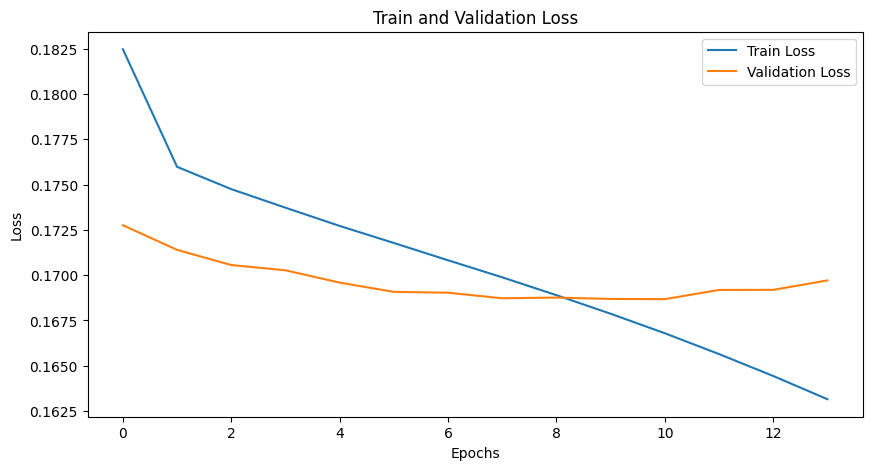

Epoch: 15, Train loss: 0.162, Val loss: 0.170, Epoch time = 159.053s


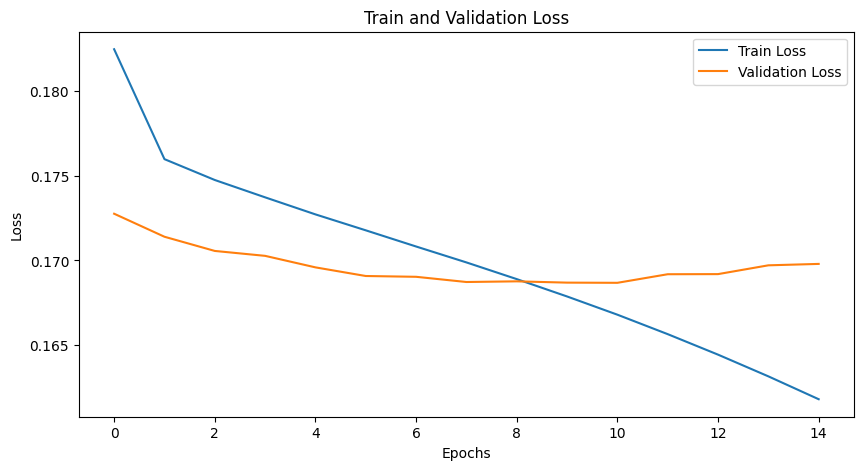

Epoch: 16, Train loss: 0.160, Val loss: 0.171, Epoch time = 159.062s


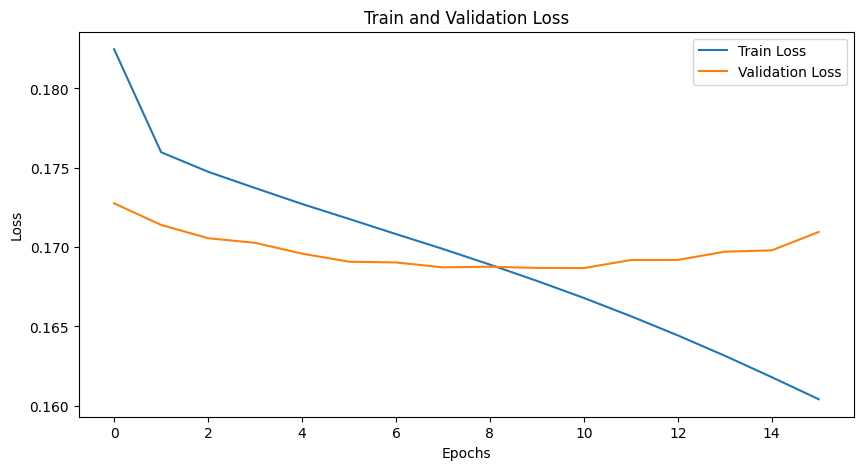

Epoch: 17, Train loss: 0.159, Val loss: 0.172, Epoch time = 159.403s


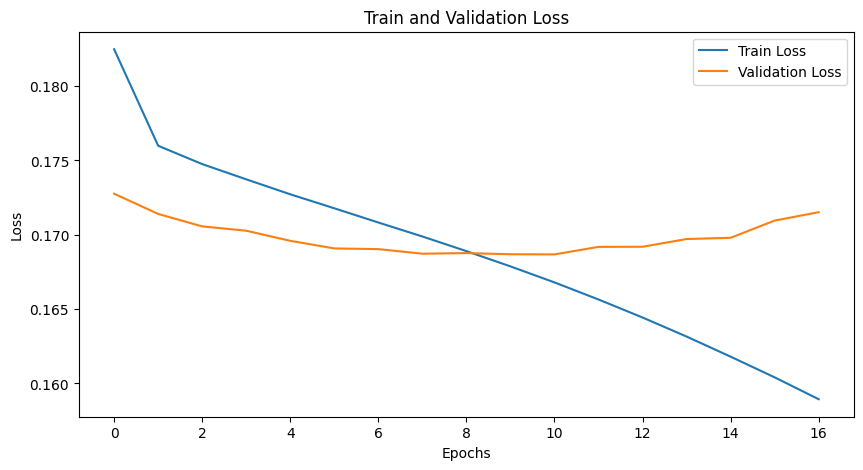

Epoch: 18, Train loss: 0.157, Val loss: 0.171, Epoch time = 162.440s


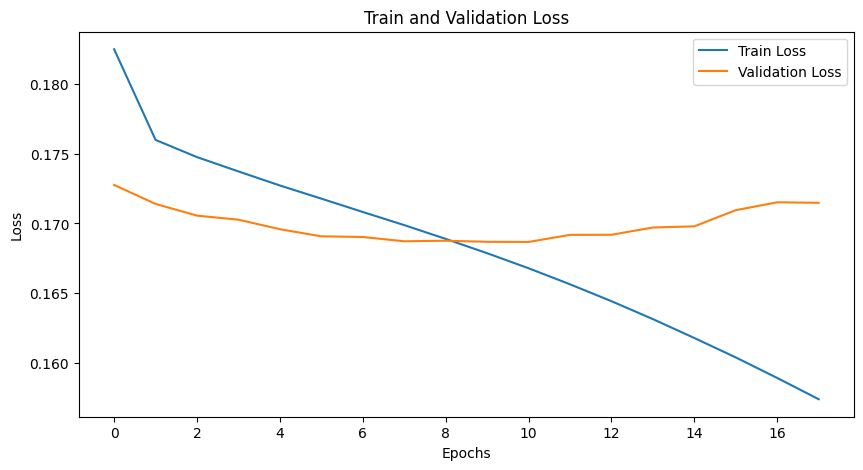

Epoch: 19, Train loss: 0.156, Val loss: 0.173, Epoch time = 158.974s


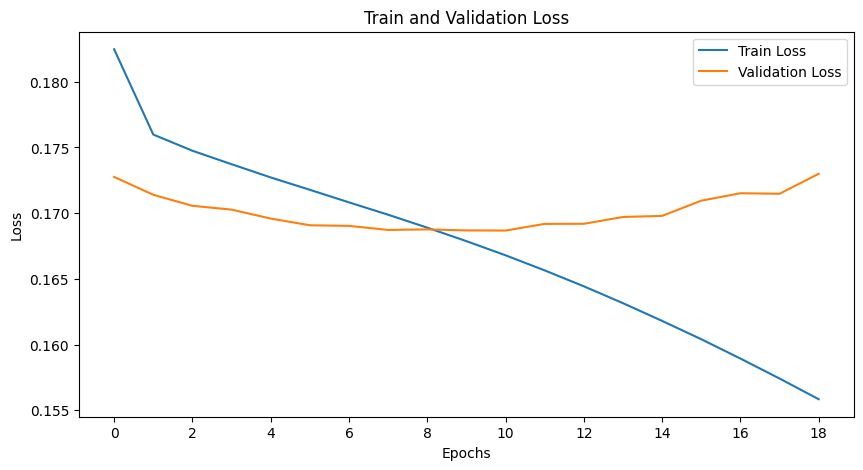

Epoch: 20, Train loss: 0.154, Val loss: 0.175, Epoch time = 159.105s


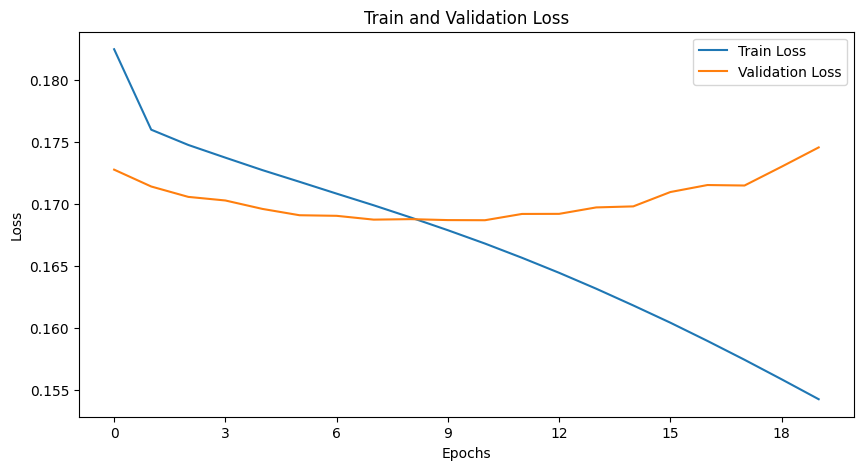

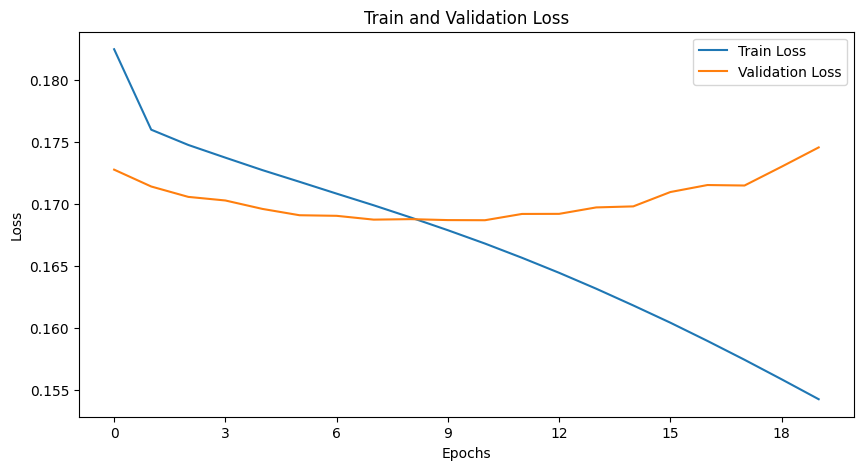

In [3]:
config = helper.create_json_template()

# Set model project name (for directory name)
config["model_project_name"] = "transformer_1.0"

# Set model parameters
config["model_params"]["num_emb"] = 24
config["model_params"]["hidden_size"] = 1024
config["model_params"]["num_layers"] = 8
config["model_params"]["num_heads"] = 8
# config["model_params"]["output_dim"] = 10  can be set optionally

# Set training parameters
config["training_params"]["learning_rate"] = 0.0001
config["training_params"]["num_epochs"] = 20
config["training_params"]["optimizer"] = "Adam"
config["training_params"]["loss_fn"] = "BCEWithLogitsLoss"

# Set training data parameters
config["training_data_params"]["sos_token"] = [[1] * 24]
config["training_data_params"]["pad_token"] = [[2] * 24]
config["training_data_params"]["snapshot_interval"] = 0.1
config["training_data_params"]["batch_size"] = 512
config["training_data_params"]["sequence_length"] = 8
config["training_data_params"]["stride"] = 2
config["training_data_params"]["test_size"] = 0.2

config_path = helper.save_json_config(config, projects_path)

helper.train_model_from_config(str(config_path), dataset_dir, device)

Processed dataset (1038/1038): 100%|██████████| 1038/1038 [00:13<00:00, 74.42it/s]


Processed 1038 of 1038 files
The train loader has 2044 batches with a size of 512
The model is trained on approximately 1046528 sequences
Start training Model with following parameters:
model_project_name: transformer_1.2
model_params: 
  model_topology: Transformer(
  (embedding): Linear(in_features=24, out_features=1024, bias=True)
  (pos_emb): SinusoidalPosEmb()
  (blocks): ModuleList(
    (0-7): 8 x TransformerBlock(
      (norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (multihead_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
      )
      (norm2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (mlp): Sequential(
        (0): Linear(in_features=1024, out_features=4096, bias=True)
        (1): ELU(alpha=1.0)
        (2): Linear(in_features=4096, out_features=1024, bias=True)
      )
    )
  )
  (fc_out): Linear(in_features=1024, out_features=24, bias=True)
)
  num_emb

Epoch: 1, Train loss: 0.199, Val loss: 0.192, Epoch time = 94.627s


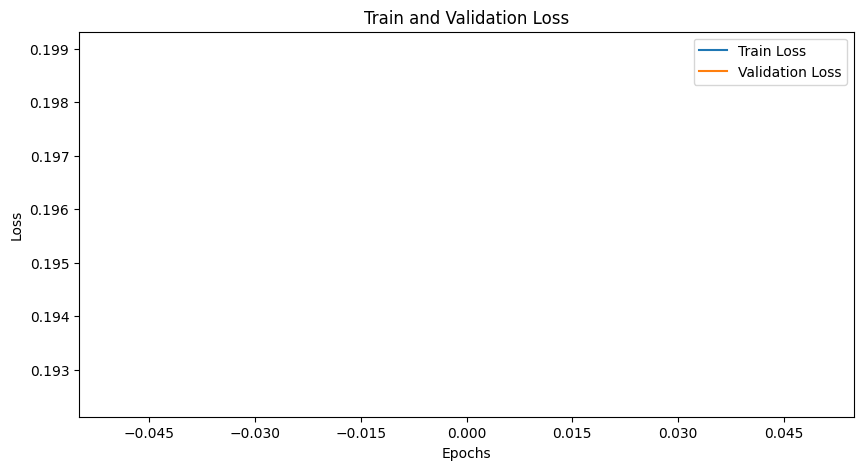

Epoch: 2, Train loss: 0.194, Val loss: 0.192, Epoch time = 92.605s


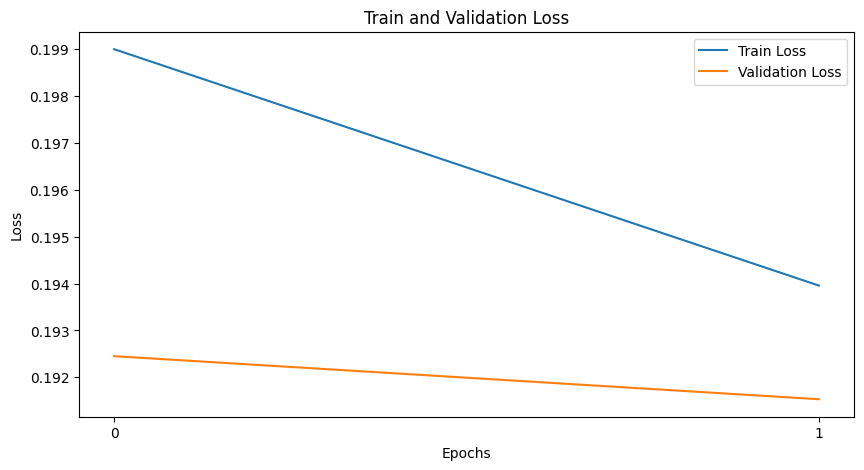

Epoch: 3, Train loss: 0.193, Val loss: 0.191, Epoch time = 91.979s


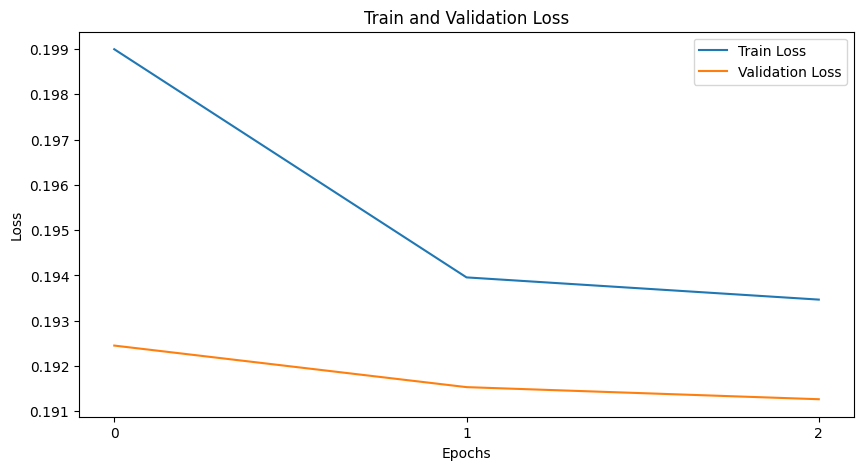

Epoch: 4, Train loss: 0.193, Val loss: 0.191, Epoch time = 97.149s


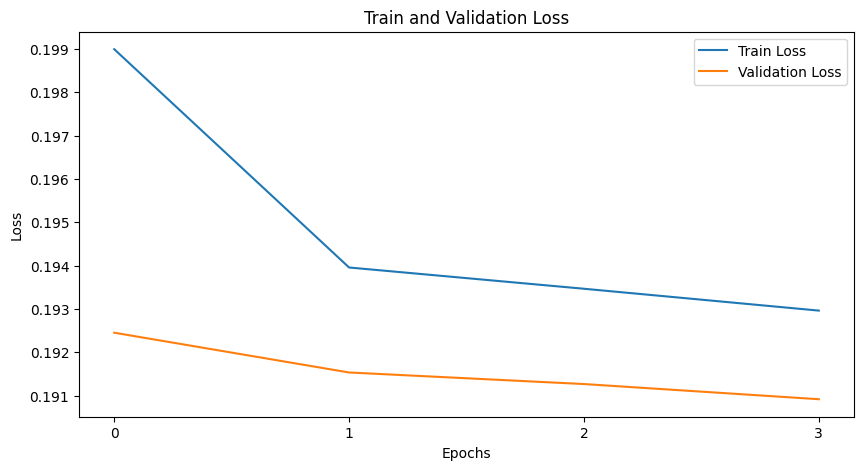

Epoch: 5, Train loss: 0.193, Val loss: 0.191, Epoch time = 91.143s


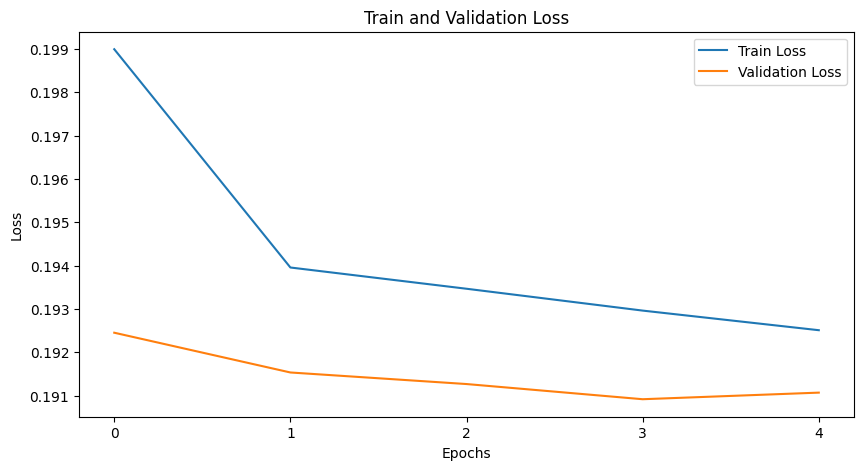

Epoch: 6, Train loss: 0.192, Val loss: 0.191, Epoch time = 92.396s


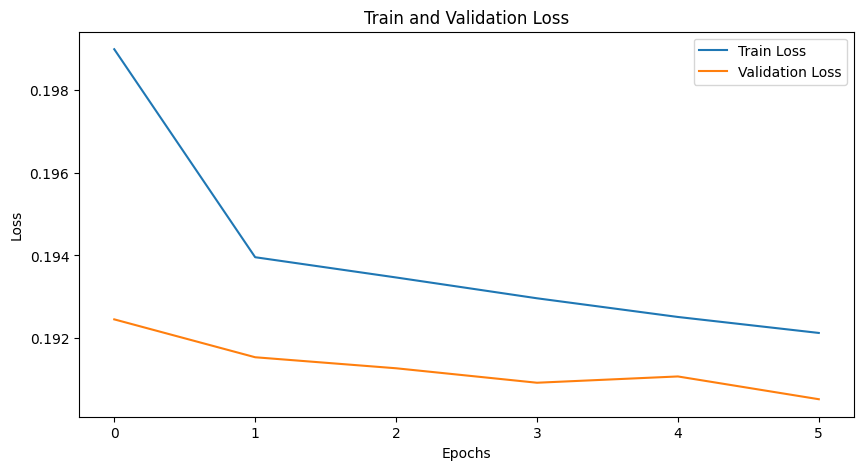

Epoch: 7, Train loss: 0.192, Val loss: 0.190, Epoch time = 91.301s


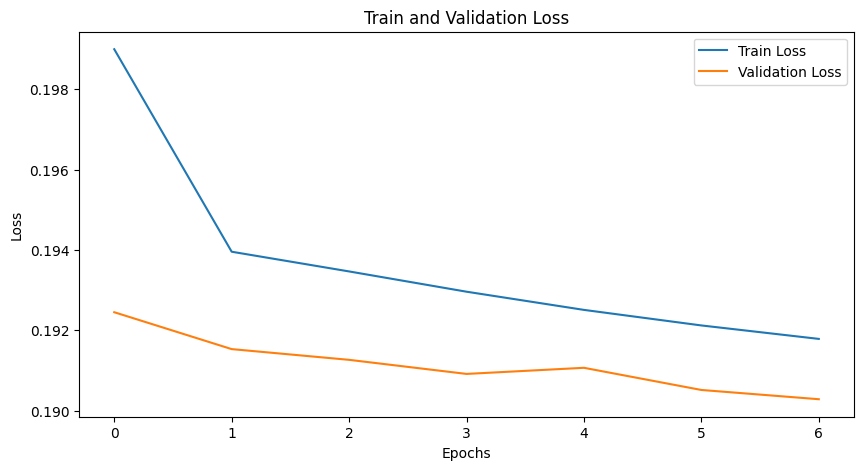

Epoch: 8, Train loss: 0.191, Val loss: 0.190, Epoch time = 89.910s


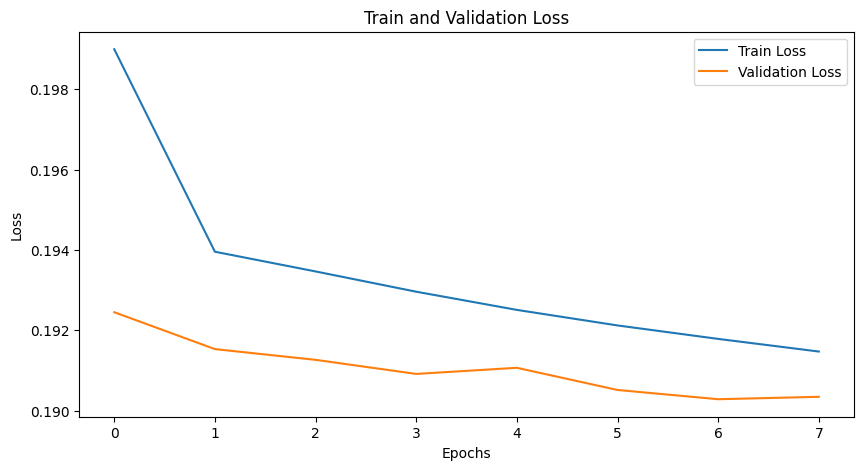

Epoch: 9, Train loss: 0.191, Val loss: 0.190, Epoch time = 89.913s


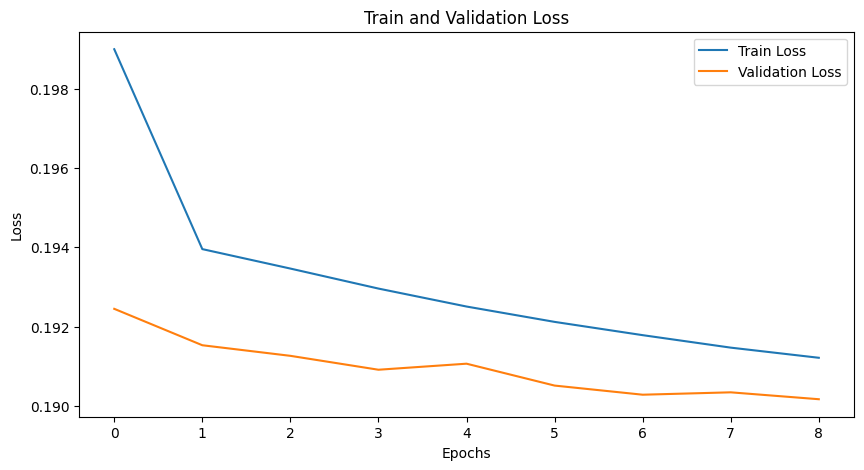

Epoch: 10, Train loss: 0.191, Val loss: 0.190, Epoch time = 89.956s


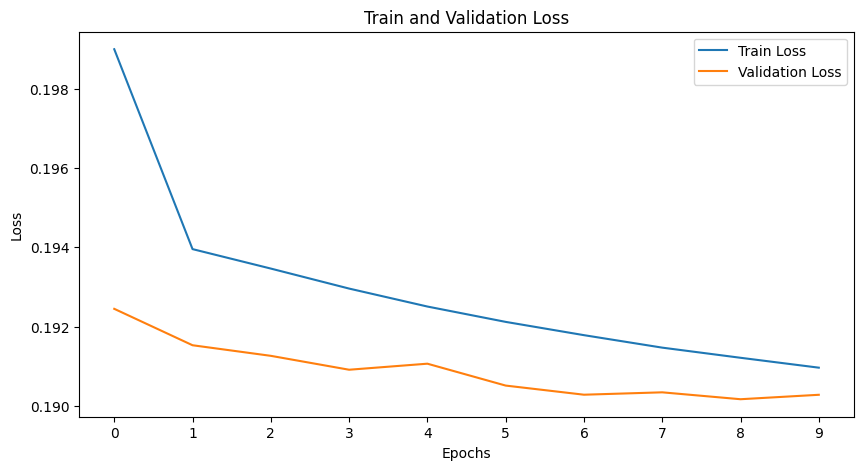

Epoch: 11, Train loss: 0.191, Val loss: 0.190, Epoch time = 89.845s


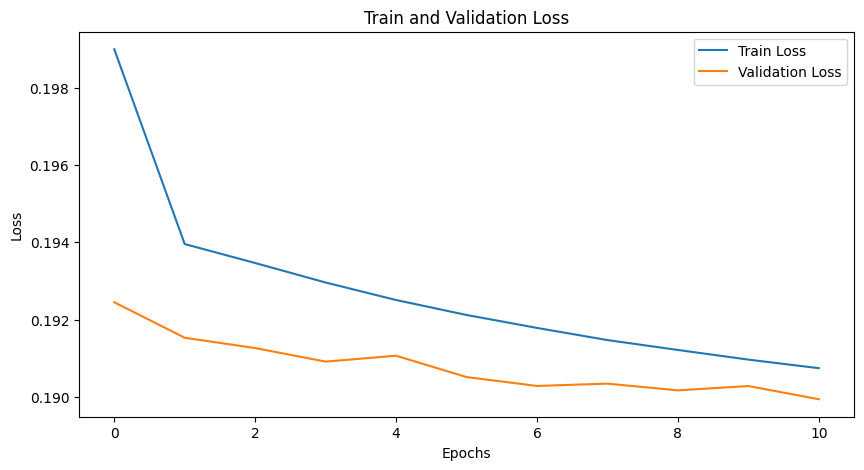

Epoch: 12, Train loss: 0.191, Val loss: 0.190, Epoch time = 89.822s


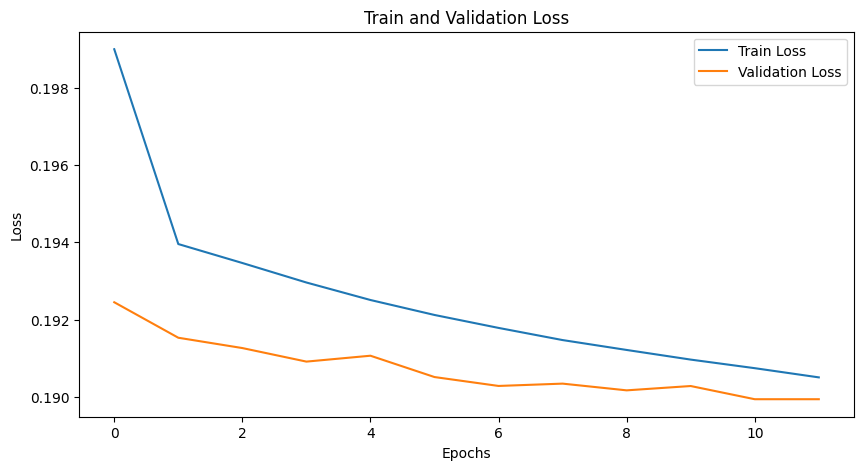

Epoch: 13, Train loss: 0.190, Val loss: 0.190, Epoch time = 89.995s


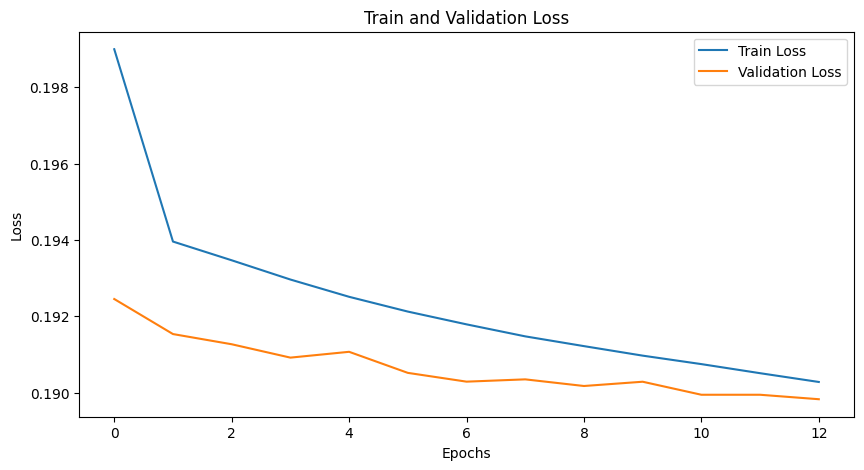

Epoch: 14, Train loss: 0.190, Val loss: 0.190, Epoch time = 89.932s


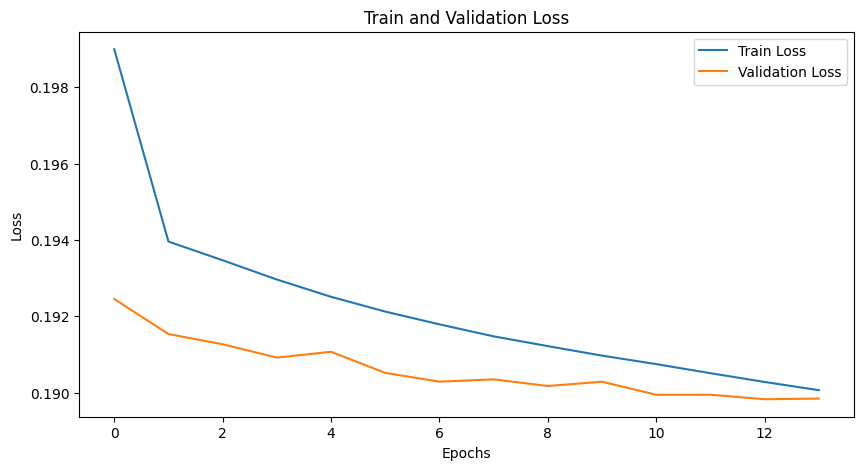

Epoch: 15, Train loss: 0.190, Val loss: 0.190, Epoch time = 89.843s


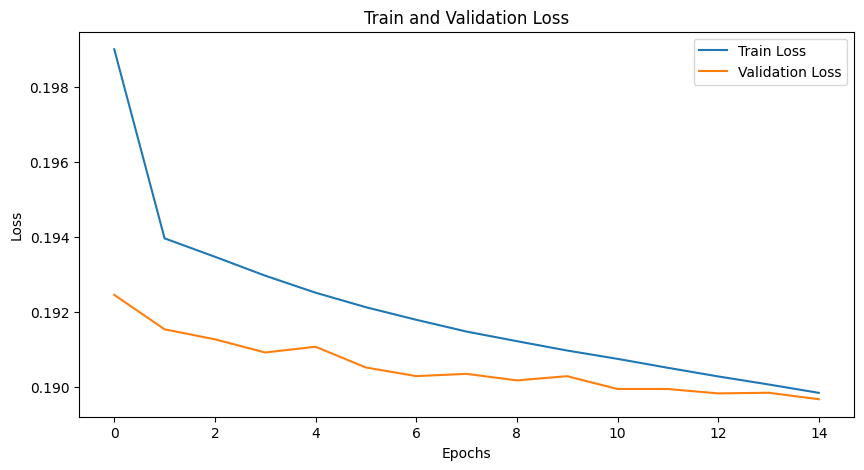

Epoch: 16, Train loss: 0.190, Val loss: 0.190, Epoch time = 89.986s


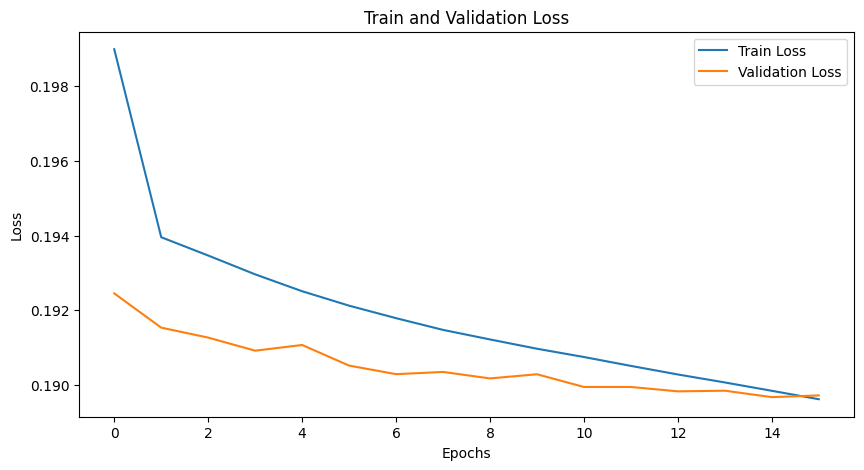

Epoch: 17, Train loss: 0.189, Val loss: 0.190, Epoch time = 89.932s


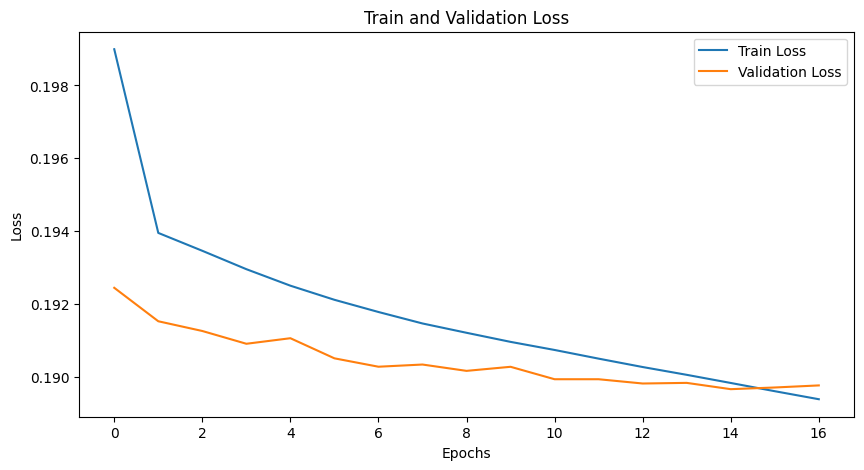

Epoch: 18, Train loss: 0.189, Val loss: 0.190, Epoch time = 89.951s


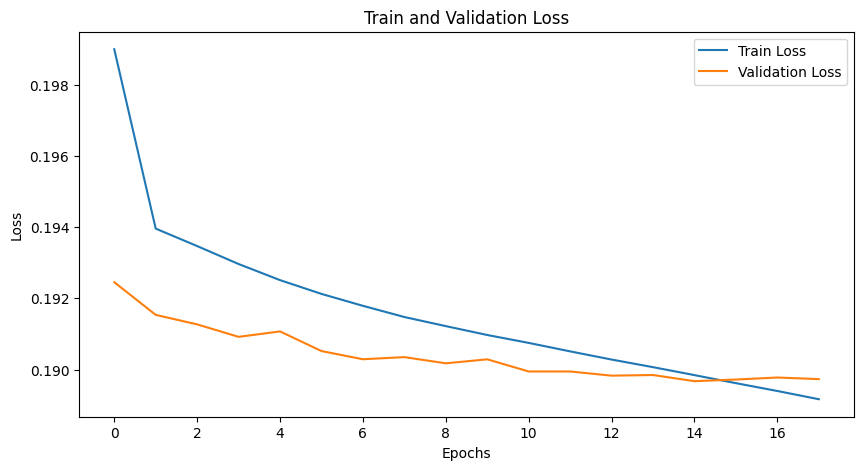

Epoch: 19, Train loss: 0.189, Val loss: 0.190, Epoch time = 89.885s


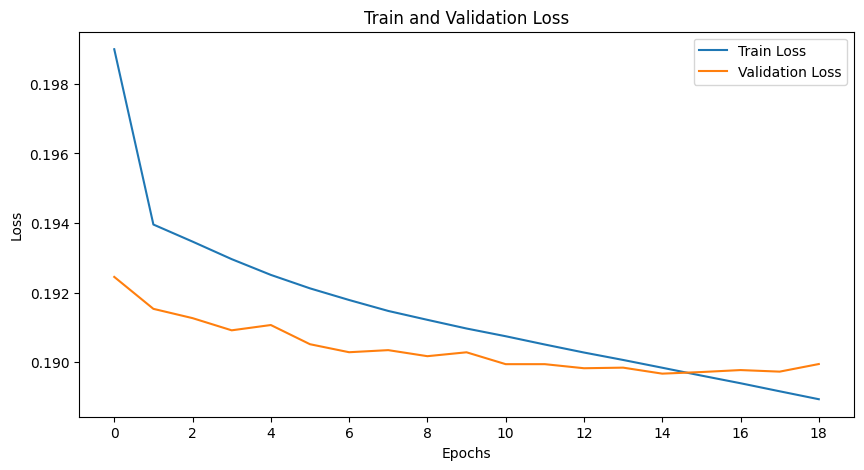

Epoch: 20, Train loss: 0.189, Val loss: 0.190, Epoch time = 95.014s


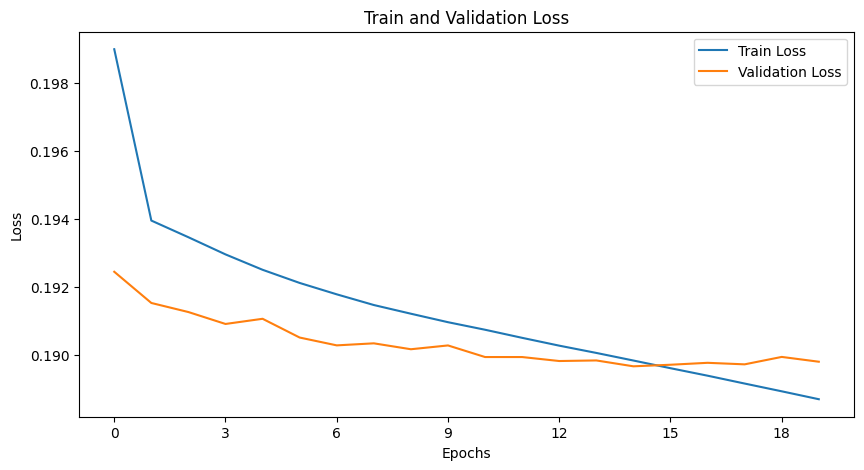

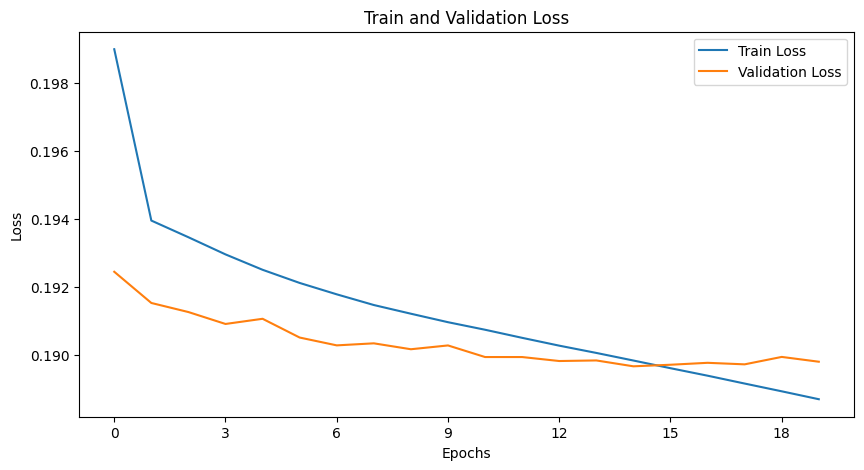

In [4]:
config = helper.create_json_template()

# Set model project name (for directory name)
config["model_project_name"] = "transformer_1.2"

# Set model parameters
config["model_params"]["num_emb"] = 24
config["model_params"]["hidden_size"] = 1024
config["model_params"]["num_layers"] = 8
config["model_params"]["num_heads"] = 16
# config["model_params"]["output_dim"] = 10  can be set optionally

# Set training parameters
config["training_params"]["learning_rate"] = 0.0001
config["training_params"]["num_epochs"] = 20
config["training_params"]["optimizer"] = "Adam"
config["training_params"]["loss_fn"] = "BCEWithLogitsLoss"

# Set training data parameters
config["training_data_params"]["sos_token"] = [[1] * 24]
config["training_data_params"]["pad_token"] = [[2] * 24]
config["training_data_params"]["snapshot_interval"] = 0.1
config["training_data_params"]["batch_size"] = 512
config["training_data_params"]["sequence_length"] = 4
config["training_data_params"]["stride"] = 2
config["training_data_params"]["test_size"] = 0.2

config_path = helper.save_json_config(config, projects_path)

helper.train_model_from_config(str(config_path), dataset_dir, device)